<a href="https://colab.research.google.com/github/WankhedeAmey/ML/blob/main/t_SNE_on_crabs_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# Libraries
import pandas as pd
from google.colab import files
import io

from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

##Import data

In [4]:
crabs_data = pd.read_csv('crabs.csv')
# Rename the columns
crabs_data = crabs_data.rename(columns={'sp':'species','FL':'Frontal Lobe','RW':'Rear Width','CL':'Carapace Midline',
                                        'CW':'Maximum Width','BD':'Body Depth'})

#Rename row-data
crabs_data['species'] = crabs_data['species'].map({'B':'Blue','O':'Orange'})
crabs_data['sex'] = crabs_data['sex'].map({'M':'Male','F':'Female'})

In [5]:
crabs_data.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2


In [10]:
#define class
crabs_data['class'] = crabs_data.species + crabs_data.sex
crabs_data['class'].value_counts()

#define relevant features
rel_feat = ['Frontal Lobe',	'Rear Width', 'Carapace Midline', 'Maximum Width', 'Body Depth']

crabs_data.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2,BlueMale


### t-Stochastic Neighbor Embedding(t-SNE)

tSNE transforms the distances between points into probabilities and then tries to keep the same probability distributions while transforming the data to a lower dimensional space.

It depends on initialization and its result may change between runs, it also depends strongly on its parameters. It is generally used for visualization only, not for dimensionality reduction.

The most important parameters of this model are:

- Perplexity: Balances attention between the local and global aspects of the data. This will usually be between 5 and 50 and has a very strong effect on the final display.
- Number of iterations.

## Using raw data(no preprocess)

In [28]:
tsne = TSNE(n_components=2, perplexity=10, n_iter=2000, init='random')

# fit the model on traning data & apply the transformation
crabs_tsne_2d = tsne.fit_transform(crabs_data[rel_feat])

crabs_data[['TSNE1', 'TSNE2']] = crabs_tsne_2d

In [29]:
crabs_data.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class,TSNE1,TSNE2
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale,-52.134594,-2.865803
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale,-50.648426,-1.337262
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale,-50.000027,0.662905
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale,-46.831070,1.833097
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2,BlueMale,-47.362438,2.888052


### Plot the graphs

<Axes: xlabel='TSNE1', ylabel='TSNE2'>

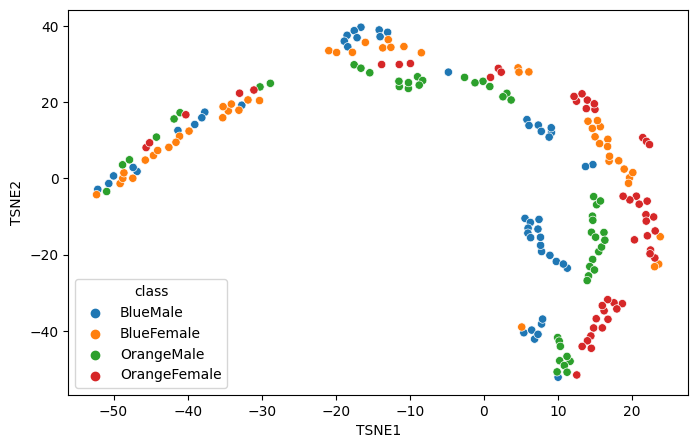

In [30]:
# 2D plot
fig = plt.figure(figsize=(8, 5))

sns.scatterplot(x='TSNE1', y='TSNE2', hue='class', data=crabs_data)

### For 3D plots

In [36]:
crabs_tsne_3d = TSNE(n_components=3, perplexity=10, n_iter=2000, init='random').fit_transform(crabs_data[rel_feat])

crabs_data[['TSNE1', 'TSNE2', 'TSNE3']] = crabs_tsne_3d

crabs_data.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class,TSNE1,TSNE2,TSNE3
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale,-12.055773,-14.836287,-4.891811
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale,-12.982100,-14.100216,-4.923337
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale,-13.055637,-12.944960,-5.061113
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale,-13.400548,-11.949236,-5.738436
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2,BlueMale,-13.389488,-11.891862,-5.963372


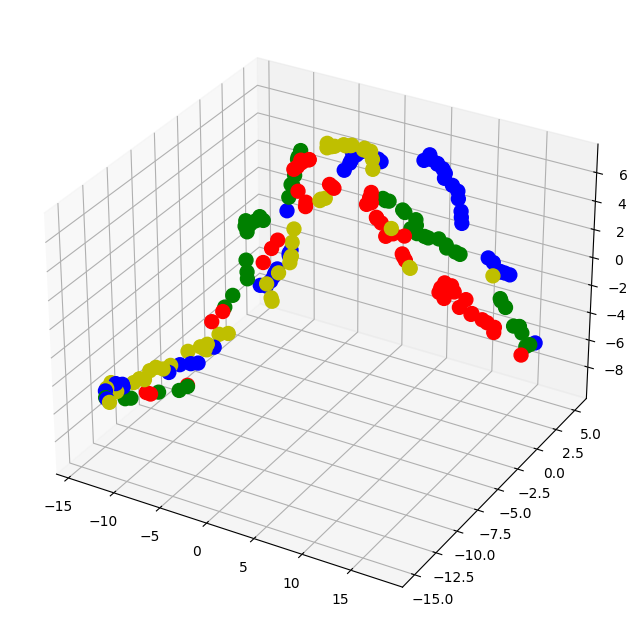

In [38]:
# 3D plot
colors_crabs = {'BlueFemale':'y','BlueMale':'b','OrangeFemale':'r','OrangeMale':'g'}


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')

plt.scatter(crabs_data.TSNE1,crabs_data.TSNE2,zs=crabs_data.TSNE3,depthshade=False,
            c=crabs_data['class'].apply(lambda x: colors_crabs[x]),s=100)


In [37]:
# Using plotly for 3D plots

fig=px.scatter_3d(crabs_data, x='TSNE1', y='TSNE2', z='TSNE3', color='class')
fig.show()

## Using Scaled Data

In [42]:
# new data
min_max_crabs = crabs_data.copy()

#scale the data
min_max_crabs[rel_feat] = MinMaxScaler().fit_transform(crabs_data[rel_feat])

min_max_crabs.describe().T

,count,mean,std,min,25%,50%,75%,max
index,200.0,25.500000,14.467083,1.000000,13.000000,25.500000,38.000000,50.000000
Frontal Lobe,200.0,0.527233,0.219832,0.000000,0.358491,0.525157,0.682390,1.000000
Rear Width,200.0,0.455365,0.187835,0.000000,0.328467,0.459854,0.569343,1.000000
Carapace Midline,200.0,0.529043,0.216382,0.000000,0.382219,0.528875,0.684650,1.000000
Maximum Width,200.0,0.515053,0.209919,0.000000,0.384000,0.525333,0.664000,1.000000
Body Depth,200.0,0.511645,0.220953,0.000000,0.341935,0.503226,0.677419,1.000000
TSNE1,200.0,-1.866915,10.241506,-13.996026,-12.076754,-3.995377,6.821906,17.896618
TSNE2,200.0,-0.239872,4.735972,-14.921352,-1.427197,1.301878,2.612463,5.115566
TSNE3,200.0,-0.531547,4.613518,-9.183876,-4.899692,0.325336,3.780496,6.816333


In [45]:
# Applying TSNE on this scaled data
tsne_scaled = TSNE(n_components=2, perplexity=10, n_iter=2000, init='random').fit_transform(min_max_crabs[rel_feat])

min_max_crabs[['TSNE1', 'TSNE2']] = tsne_scaled

min_max_crabs.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class,TSNE1,TSNE2,TSNE3
0,Blue,Male,1,0.056604,0.014599,0.042553,0.050667,0.058065,BlueMale,6.040952,-56.091000,-4.891811
1,Blue,Male,2,0.100629,0.087591,0.103343,0.098667,0.083871,BlueMale,4.386420,-54.613651,-4.923337
2,Blue,Male,3,0.125786,0.094891,0.130699,0.141333,0.103226,BlueMale,3.515344,-53.131927,-5.061113
3,Blue,Male,4,0.150943,0.102190,0.164134,0.160000,0.135484,BlueMale,2.114913,-51.944836,-5.738436
4,Blue,Male,5,0.163522,0.109489,0.170213,0.157333,0.135484,BlueMale,0.915203,-52.098495,-5.963372


### Plot the graphs

<Axes: xlabel='TSNE1', ylabel='TSNE2'>

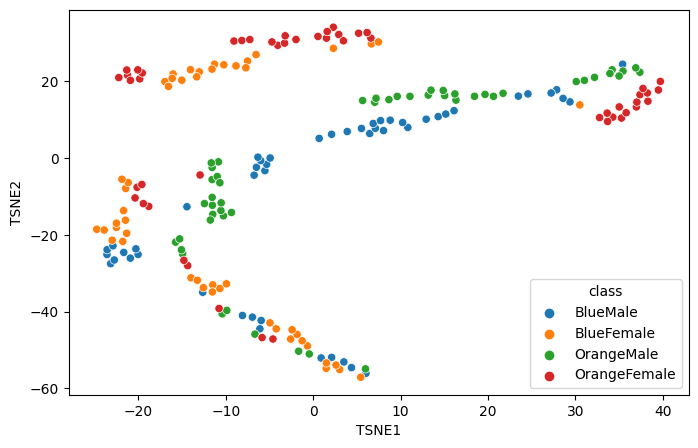

In [46]:
# 2D plot
fig = plt.figure(figsize=(8, 5))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='class', data=min_max_crabs)

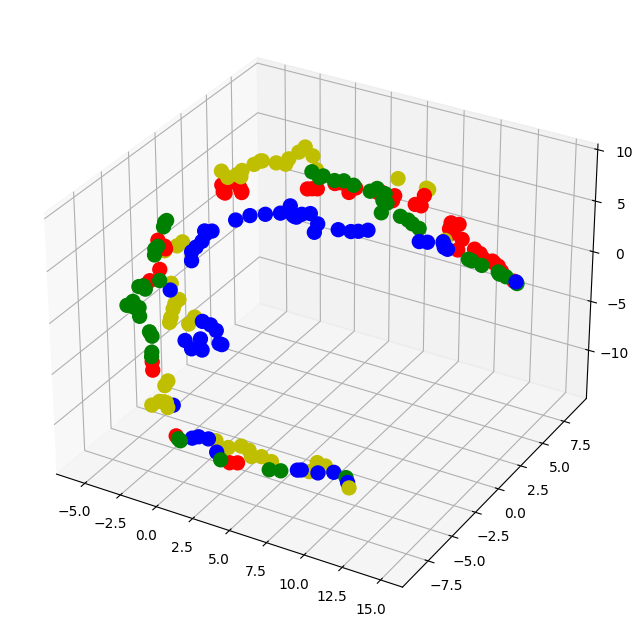

In [49]:
# 3D plots
tsne_scaled_3d = TSNE(n_components=3, perplexity=10, n_iter=2000, init='random').fit_transform(min_max_crabs[rel_feat])

min_max_crabs[['TSNE1', 'TSNE2', 'TSNE3']] = tsne_scaled_3d

colors_crabs = {'BlueFemale':'y','BlueMale':'b','OrangeFemale':'r','OrangeMale':'g'}


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')

plt.scatter(min_max_crabs.TSNE1,min_max_crabs.TSNE2,zs=min_max_crabs.TSNE3,depthshade=False,
            c=min_max_crabs['class'].apply(lambda x: colors_crabs[x]),s=100)


In [50]:
# Using plotly for 3D plots

fig=px.scatter_3d(min_max_crabs, x='TSNE1', y='TSNE2', z='TSNE3', color='class')
fig.show()

## Using Standardized Data

In [53]:
crabs_standard = crabs_data.copy()

crabs_standard[rel_feat] = StandardScaler().fit_transform(crabs_data[rel_feat])

crabs_standard.describe().T

,count,mean,std,min,25%,50%,75%,max
index,200.0,2.550000e+01,14.467083,1.000000,13.000000,25.500000,38.000000,50.000000
Frontal Lobe,200.0,-7.105427e-17,1.002509,-2.404365,-0.769523,-0.009465,0.707571,2.155984
Rear Width,200.0,6.039613e-16,1.002509,-2.430365,-0.677276,0.023959,0.608322,2.906815
Carapace Midline,200.0,1.065814e-16,1.002509,-2.451077,-0.680241,-0.000775,0.720938,2.181966
Maximum Width,200.0,-4.973799e-16,1.002509,-2.459741,-0.625872,0.049094,0.711325,2.315960
Body Depth,200.0,0.000000e+00,1.002509,-2.321439,-0.770008,-0.038200,0.752152,2.215766
TSNE1,200.0,-1.866915e+00,10.241506,-13.996026,-12.076754,-3.995377,6.821906,17.896618
TSNE2,200.0,-2.398718e-01,4.735972,-14.921352,-1.427197,1.301878,2.612463,5.115566
TSNE3,200.0,-5.315465e-01,4.613518,-9.183876,-4.899692,0.325336,3.780496,6.816333


### Applying t-SNE on standardized data

<Axes: xlabel='TSNE1', ylabel='TSNE2'>

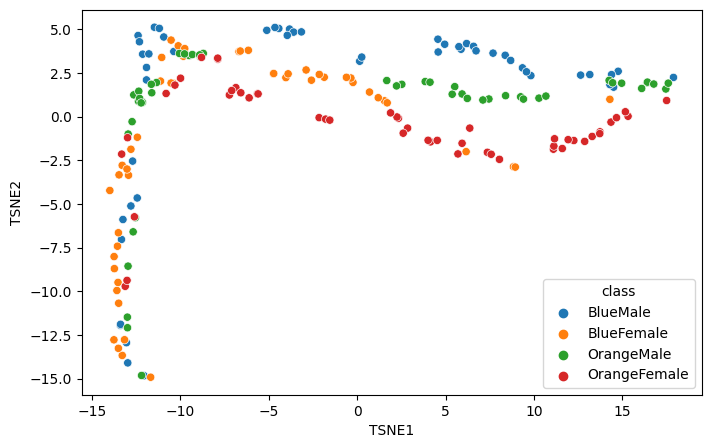

In [56]:
tsne_std = TSNE(n_components=2, perplexity=10, n_iter=2000, init='random').fit_transform(crabs_standard[rel_feat])

crabs_standard['TSNE1', 'TSNE2'] = tsne_std

#2D plot
fig=plt.figure(figsize=(8, 5))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='class', data=crabs_standard)

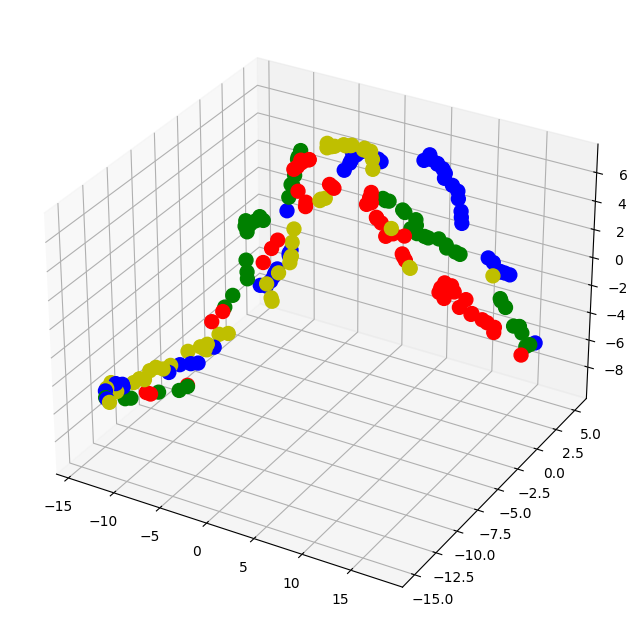

In [57]:
# 3D plot
tsne_std_3d = TSNE(n_components=3, perplexity=10, n_iter=2000, init='random').fit_transform(crabs_standard[rel_feat])

min_max_crabs[['TSNE1', 'TSNE2', 'TSNE3']] = tsne_std_3d

colors_crabs = {'BlueFemale':'y','BlueMale':'b','OrangeFemale':'r','OrangeMale':'g'}


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')

plt.scatter(crabs_standard.TSNE1,crabs_standard.TSNE2,zs=crabs_standard.TSNE3,depthshade=False,
            c=crabs_standard['class'].apply(lambda x: colors_crabs[x]),s=100)

In [58]:
# Using plotly for 3D plots

fig=px.scatter_3d(crabs_standard, x='TSNE1', y='TSNE2', z='TSNE3', color='class')
fig.show()

## Summary of TSNE


The t-Distributed Stochastic Neighbor Embedding (t-SNE) technique is a nonlinear dimensionality reduction method used for visualizing high-dimensional data in lower dimensions, typically 2D or 3D. It's particularly effective in visualizing complex patterns and structures present in high-dimensional data by preserving local and global structure relationships between data points.

Here's an overview of the key aspects of t-SNE:

1. **Stochastic Nature**:
   - t-SNE is stochastic in nature, meaning it involves randomness in its optimization process.
   - The optimization procedure involves the minimization of a cost function to find an embedding that best represents the relationships between data points.
   - The randomness in the algorithm's optimization process involves using a random initialization and applying random perturbations during optimization.

2. **Nonlinear Embedding**:
   - Unlike linear methods (such as PCA), t-SNE is nonlinear, which allows it to capture and visualize complex nonlinear relationships between high-dimensional data points.
   - It aims to map similar data points in high-dimensional space to nearby points in the lower-dimensional space while separating dissimilar points.

3. **Preservation of Local and Global Structure**:
   - t-SNE emphasizes the preservation of both local and global structures of the data.
   - Local structures refer to the relationships between nearby points, while global structures involve the broader relationships between clusters or groups of data points.

4. **Visualization**:
   - It's often used for visualizing high-dimensional datasets in 2D or 3D plots, enabling an intuitive understanding of data clusters, patterns, and similarities.

5. **Complexity**:
   - t-SNE can be computationally intensive and may take longer to compute, especially for large datasets.
   - The algorithm's parameters, such as perplexity and learning rate, can significantly affect the quality of the resulting visualization.

In summary, t-SNE is a powerful technique for visualizing high-dimensional data by embedding it into lower dimensions while preserving the relationships between data points. Its stochastic nature and nonlinear properties make it suitable for revealing complex structures present in the data, aiding in data exploration and visualization.